In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

**1)** Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [7]:
data = pd.read_csv('water.txt', sep='\t')
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


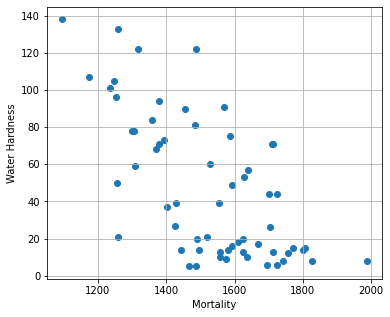

In [12]:
plt.figure(figsize=(6,5))
plt.scatter(data['mortality'], data['hardness'])
plt.grid()
plt.xlabel('Mortality')
plt.ylabel('Water Hardness');

Явно имеется отрицательная корреляция

In [15]:
print('Pearson Correlation: %.4f' %data['mortality'].corr(data['hardness']))
print('Spearman Correlation: %.4f' %data['mortality'].corr(data['hardness'], method='spearman'))

Pearson Correlation: -0.6548
Spearman Correlation: -0.6317


**2)** Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

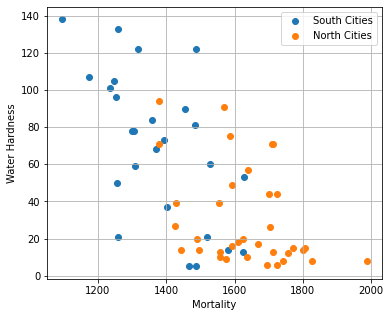

In [21]:
# Разобьем города
s_cities = data[data['location'] == 'South']
n_cities = data[data['location'] == 'North']

# Взглянем на график 
plt.figure(figsize=(6,5))
plt.scatter(s_cities['mortality'], s_cities['hardness'], label='South Cities')
plt.scatter(n_cities['mortality'], n_cities['hardness'], label='North Cities')
plt.xlabel('Mortality')
plt.ylabel('Water Hardness')
plt.grid()
plt.legend();

По графику видно, что в южных городах смертность меньше, чем в северных.

In [23]:
print('Pearson Correlation (South Cities): %.4f' %s_cities['mortality'].corr(s_cities['hardness']))
print('Pearson Correlation (North Cities): %.4f' %n_cities['mortality'].corr(n_cities['hardness']))

Pearson Correlation (South Cities): -0.6022
Pearson Correlation (North Cities): -0.3686


**4)** Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.  

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.

In [50]:
bar_data = np.array([[203, 239], [718, 515]], dtype='float')

def matthews_corr(a, b, c, d):
    return (a*d - b*c)/np.sqrt((a + b)*(a + c)*(b + d)*(c + d))

mat_corr = matthews_corr(*bar_data.flatten())
print('Matthews Correlation: %.4f' %mat_corr)

Matthews Correlation: -0.1090


**5)** В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости

Используйте функцию ```scipy.stats.chi2_contingency``` и введите номер первой значащей цифры

In [58]:
print('Chi-Squared Test, p-value: %f' %stats.chi2_contingency(bar_data)[1])

Chi-Squared Test, p-value: 0.000011


**6)** В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [61]:
def proportions_diff_confint_ind(sample1, sample2, alpha = 0.05):    
    z = stats.norm.ppf(1 - alpha / 2.)

    p1 = sample1[0] / np.sum(sample1)
    p2 = sample2[0] / np.sum(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ np.sum(sample1) + p2 * (1 - p2)/ np.sum(sample2))
    
    return (left_boundary, right_boundary)

In [63]:
print('95%% Confidence Interval For a Difference of Men and Women: [%.4f, %.4f]' %
      proportions_diff_confint_ind(bar_data[:,1], bar_data[:,0]))

95% Confidence Interval For a Difference of Men and Women: [0.0539, 0.1392]


Отличия значимы, т.к. ноль не входит

**7)** Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры.

In [65]:
def proportions_diff_z_stat_ind(sample1, sample2):
    n1 = np.sum(sample1)
    n2 = np.sum(sample2)
    
    p1 = sample1[0] / n1
    p2 = sample2[0] / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))

def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - stats.norm.cdf(z_stat)

In [66]:
print('p-value: %f' % proportions_diff_z_test(proportions_diff_z_stat_ind(bar_data[:,1], bar_data[:,0])))

p-value: 0.000008


**8)** Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [69]:
# Столбцы: Не доволен, Более или менее, Доволен
# Строки: Не очень счастлив, Достаточно счастлив, Очень счастлив

survey_data = np.array([
    [197, 111, 33],
    [382, 685, 331],
    [110, 342, 333]
], dtype='float')

In [72]:
print('Chi-Squared Test, Statistics: %.4f' %stats.chi2_contingency(survey_data)[0])

Chi-Squared Test, Statistics: 293.6831


**9)** На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры

In [73]:
stats.chi2_contingency(survey_data)

(293.68311039689746,
 2.4964299580093467e-62,
 4,
 array([[ 93.08597464, 153.74722662,  94.16679873],
        [381.6251981 , 630.318542  , 386.0562599 ],
        [214.28882726, 353.93423138, 216.77694136]]))

**10)** Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки. 

In [75]:
def cramers_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

print('V Cramer stat value: %.4f' % cramers_stat(survey_data))

V Cramer stat value: 0.2412
